# Exercise

1. How would you define clustering? Can you name a few clustering algorithms?
2. What are some of the main applications of clustering algorithms?
3. Describe two techniques to select the right number of clusters when using k-means.
4. What is label propagation? Why would you implement it, and how?
5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?
6. Can you think of a use case where active learning would be useful? How would you implement it?
7. What is the difference between anomaly detection and novelty detection?
8. What is a Gaussian mixture? What tasks can you use it for?
9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?
10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?
11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?
12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).
13. Some dimensionality reduction techniques can also be used for anomaly detec‐ tion. For example, take the Olivetti faces dataset and reduce it with PCA, preserv‐ ing 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.


1) Clustering is the grouping of similar data. Kmeans,DBSCAN,Gaussian Mixture Model,Bayesian Gaussian Mixture 
Model

2) Image Segmentation, Semi Supervised Learning, Dimensionality Reduction, Density Estimation, 
Customer Segementation

3) Silhouette Score :  silhouette score is the mean silhouette coefficient over all instance,b-a/max(b,a) to 
    calculate a single instance silhouette Coefficient, where b is the mean distance between an instance a
    other instances in the nearest cluster, while a is the mean distance between an instance and other 
    instances in its own cluster
    
    Silhouette Diagram: silhouette diagram is plot containing knife shape diagram of each cluster, where the 
        height of each diagram represents the number of instances in the cluster arranged in ascending other
        of silhouettes Coefficient and the width of the diagram is represented as the Silhouette score
        
4) Label Propagation: it is spreading/propagating the target variable/label to similar instances, 
    why? so we can label unlabled instances, how? using the LabelPropagation class
        
5) scale to large dataset: Mini-batch Kmeans   ,high density algo: Gaussian Mixture Model and DBSCAN

6) We can use active learning a factory for detecting defective products

7) Anomaly Detection: it is trained one all the data including the outlier/anomaly
    Novelty Detection: it is only trained with  the outlier

8) Gaussian mixture: it is a probalistic model that assumes each instance is generated from several similar 
    gaussian distribution 
    
    it can be used to anamoly detection
    it is used to identify different sizes, orientation clusters

9) you cant use metrics to measure how well a gmm fits the databecause it is Unreliable if the cluster 
isnt spherical or have different shapes so we have to find the model that Minimize Theoritical 
information criterion like BIC and AIC

    


In [688]:
from sklearn.model_selection import train_test_split

In [689]:
from sklearn.datasets import fetch_olivetti_faces

In [690]:
X= fetch_olivetti_faces()

In [691]:
X.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

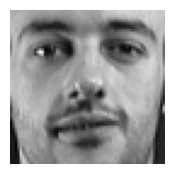

In [692]:
im = X.data[150].reshape(64,64)
plt.figure(figsize=(5,2))
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

In [693]:
X_train, X_test, y_train, y_test = train_test_split(X.data,X.target,test_size=0.2,
                                                    random_state=42,stratify=X.target)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=42,stratify=y_train)

In [694]:
kkk = [KMeans(n_clusters=k,random_state=42).fit(X_train) for k in range(89,115)]


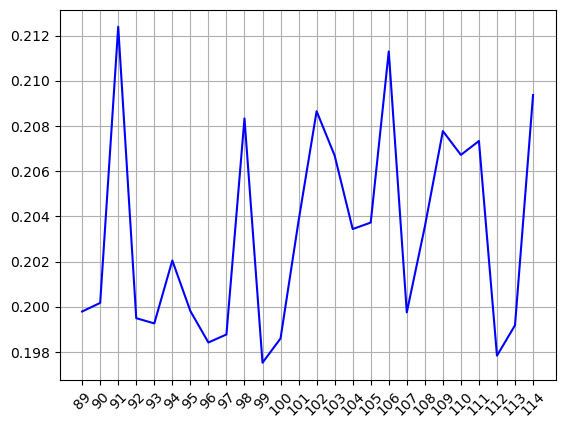

(91, 98, 111)

In [695]:
kkk_silhouette_score = [silhouette_score(X_train,i.labels_) for i in kkk]
plt.plot(range(89,115),kkk_silhouette_score,c='b')
plt.xticks(np.arange(89,115, step=1),rotation=45)
plt.grid(True)
plt.show()# 94,102,106,109,114
91,98,111

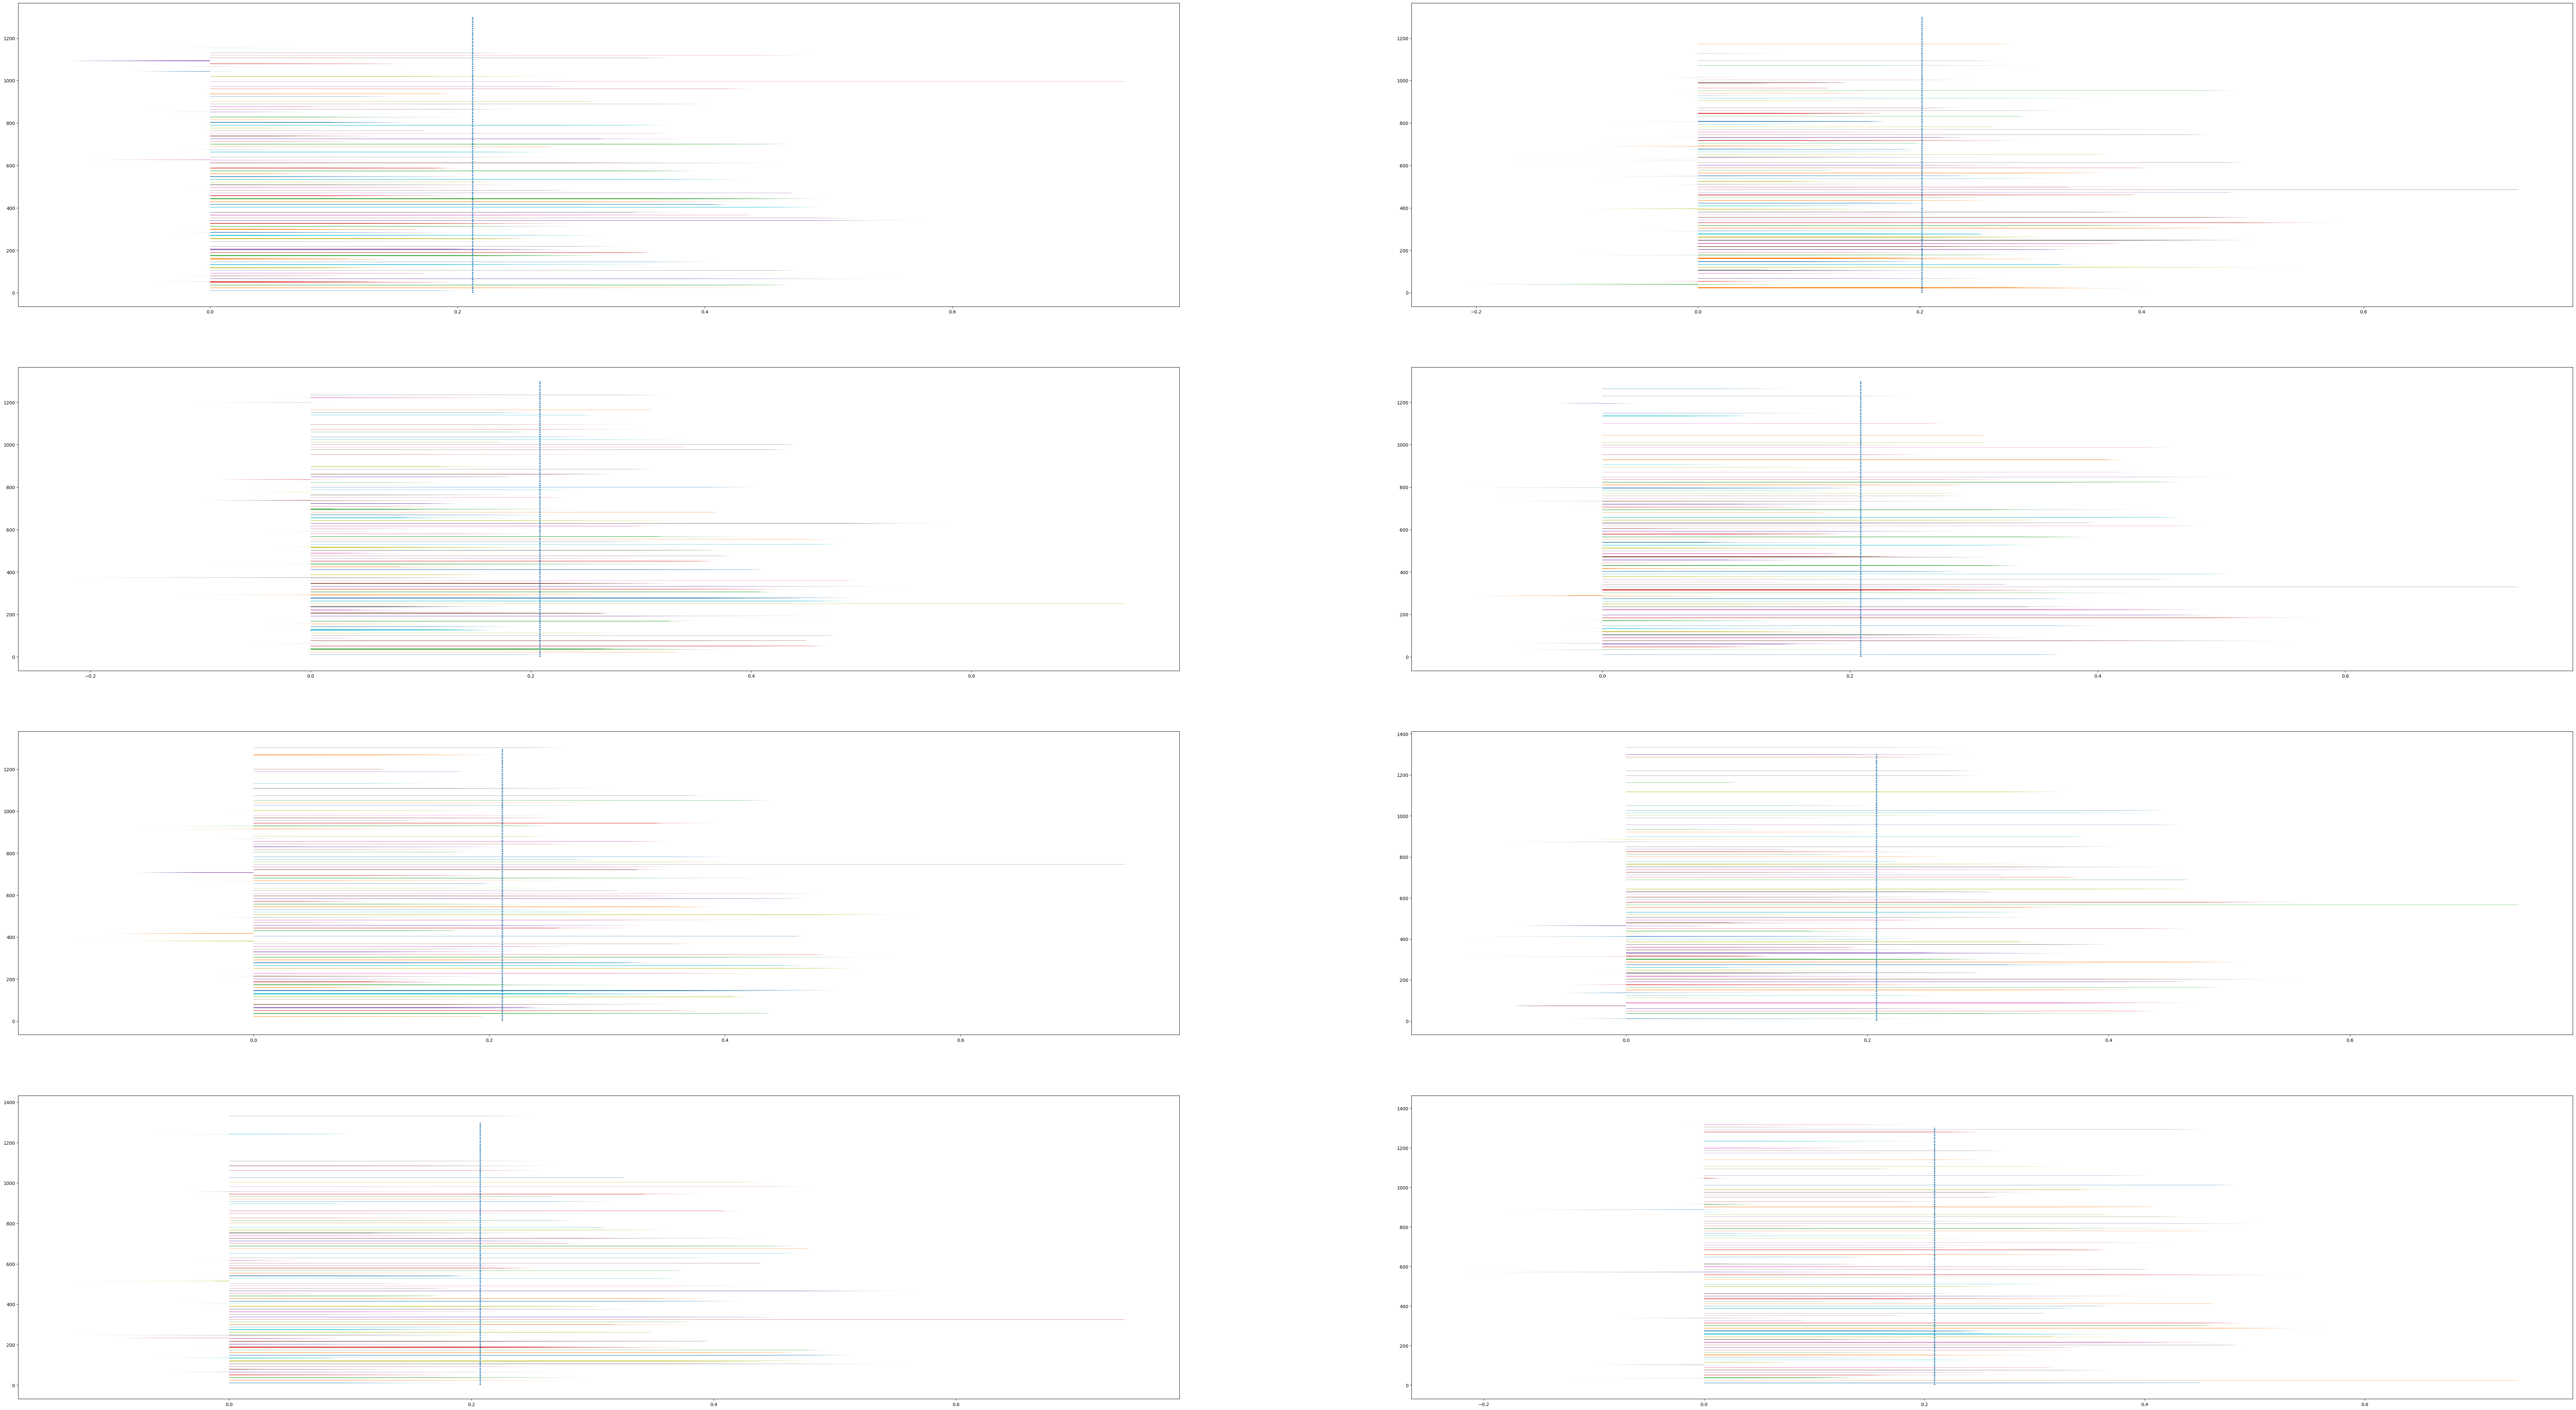

In [696]:
plt.figure(figsize=(100,55))
for j,i in enumerate(map(kkk.__getitem__, (2,5,9,13,17,20,22,25))):
    plt.subplot(4,2,j+1)
    kkk_silh_sample = silhouette_samples(X_train,i.labels_)
    kkk_silh_mean = kkk_silh_sample.mean()
    lower = 10
    for k in range(i.n_clusters):
        x = kkk_silh_sample[(i.labels_==k)]
        upper = lower + len(x)
        plt.fill_betweenx(np.arange(lower,upper),0,x)
        plt.vlines(kkk_silh_mean, ymin=0, ymax=1300,linestyles=':')
        lower =upper+10
plt.savefig('/Users/adeoyedipo/Downloads/S02')
plt.show()

        
            
        
    

In [697]:
kkk102 = kkk[13]
x_train0s = X_train[(kkk102.labels_ == 4)]

In [698]:
# len(x_train0s)
len(kkk102.labels_[(kkk102.labels_ == 60)])

5

In [699]:
#find the cluster that contain more than 2 instance
# randomly pick 10 cluster with 2 or more instances and visualize them

clusters_more_than_4 = np.array([len(kkk102.labels_[(kkk102.labels_ == k)]) > 4 for k in range(kkk102.n_clusters)])
kkk102_clusters = np.unique(kkk102.labels_)

kkk102_clusters_more_than_4 = kkk102_clusters[(clusters_more_than_4)]

In [700]:
kkk102_clusters_more_than_4

array([ 4,  7,  8, 16, 21, 23, 35, 60], dtype=int32)

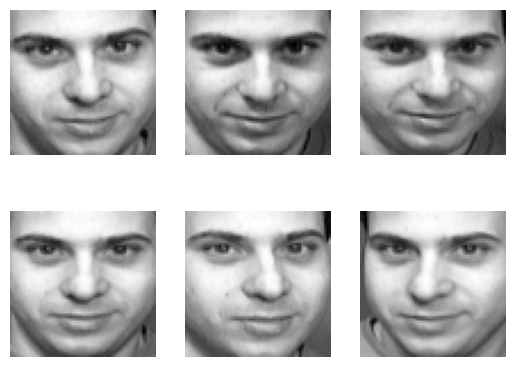

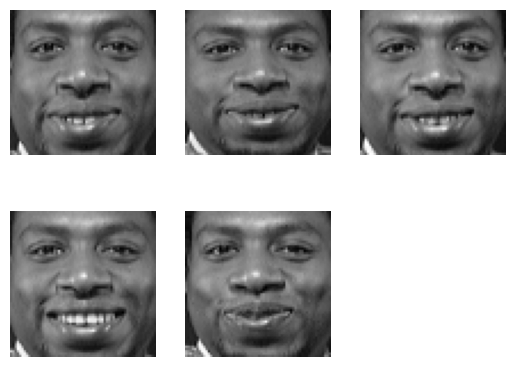

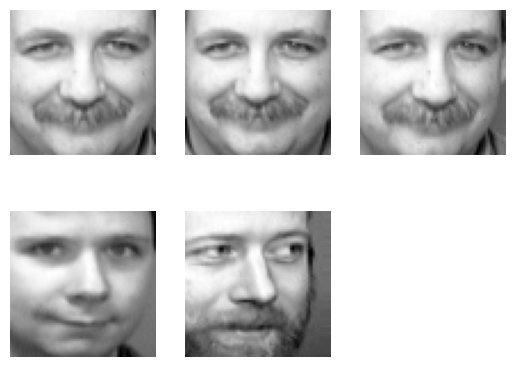

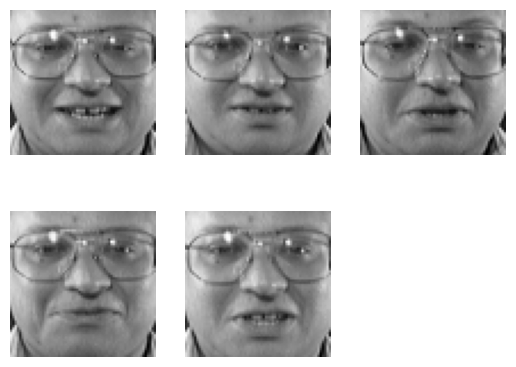

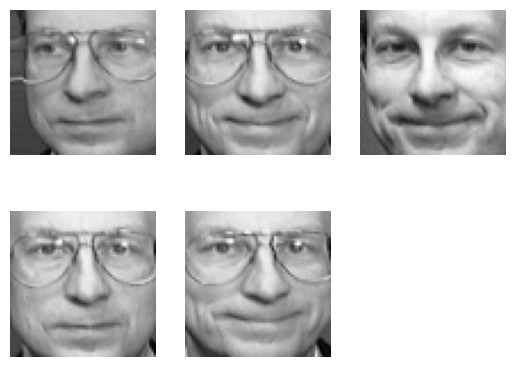

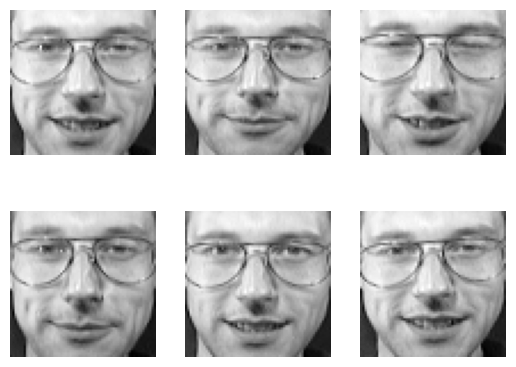

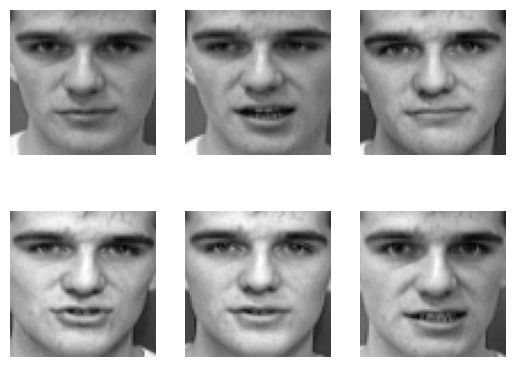

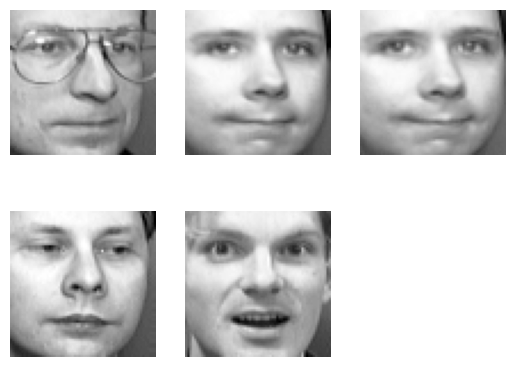

In [701]:
for i in kkk102_clusters_more_than_4:
    x_train_im = X_train[(kkk102.labels_ == i)]
    for h,j in enumerate(x_train_im):
        plt.subplot(2,3,h+1)
        plt.imshow(j.reshape(64,64),cmap='gray')
        plt.axis('off')
    plt.show()

In [729]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_predict,cross_val_score

In [730]:
olivetii_log = LogisticRegression(C=30,random_state=42)
olivetii_log.fit(X_train,y_train)


LogisticRegression(C=30, random_state=42)

In [731]:
olivetii_log.predict(X_val)
y_val

array([28,  0,  2,  3, 17,  0, 17,  8, 35,  2, 31,  1, 16,  7, 27, 38, 34,
       36, 39, 30, 23, 38, 19, 11, 37, 13, 21,  9, 11, 20, 26, 10, 18, 33,
       24,  7,  6, 36, 25, 14, 29, 20, 23, 10, 32, 29, 21, 14,  4, 22,  5,
       33, 12, 15, 22, 18,  5, 28, 30, 32, 35,  1,  3, 24])

In [732]:
# olivetii_log.score(olivetii_log,X_val,y_val)
olivetii_log.score(X_val,y_val)

0.96875

In [733]:
reduced_X_train = kkk102.transform(X_train)
kkk102.transform(X_val).shape

(64, 102)

In [734]:
best_score = 0
kkk_log = 0
for i in kkk:
    X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(i.transform(X.data),
                                            X.target,test_size=0.2,random_state=42,stratify=X.target)

    X_train_reduced,X_val_reduced,y_train,y_val = train_test_split(X_train_reduced,y_train,test_size=0.2, 
                                                               random_state=42,stratify=y_train)
    reduced_olivetii_log = LogisticRegression(random_state=42)
    reduced_olivetii_log.fit(X_train_reduced,y_train)
    evaluation_score = reduced_olivetii_log.score(X_val_reduced,y_val)
    if evaluation_score >best_score:
        best_score = evaluation_score
        kkk_log = i

In [735]:
print(best_score)
print(kkk_log)

0.921875
KMeans(n_clusters=111, random_state=42)


In [736]:
X_train_reduced111, X_test_reduced111, y_train, y_test = train_test_split(kkk_log.transform(X.data),
                                            X.target,test_size=0.2,random_state=42,stratify=X.target)

X_train_reduced111,X_val_reduced111,y_train,y_val = train_test_split(X_train_reduced111,y_train,test_size=0.2, 
                                                               random_state=42,stratify=y_train)
reduced_olivetii_log = LogisticRegression(random_state=42)
reduced_olivetii_log.fit(X_train_reduced111,y_train)

reduced_olivetii_log.score(X_val_reduced111,y_val)

0.921875

In [752]:
print(X_train_reduced111.shape)
print(X_train.shape)

(256, 111)
(256, 4096)


In [758]:
X_train_new = np.append(X_train,X_train_reduced111 ,axis=1)

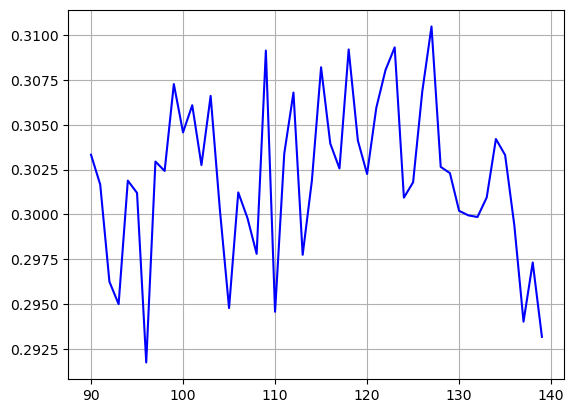

In [763]:
kkk_new = [KMeans(n_clusters=k,random_state=42).fit(X_train_new) for k in range(90,140)]
kkk_new_silhouette_score = [silhouette_score(X_train_new,i.labels_) for i in kkk_new]
plt.plot(range(90,140),kkk_new_silhouette_score,c='b')
# plt.xticks(np.arange(10,115, step=1),rotation=45)
plt.grid(True)
plt.show()

In [ ]:
kkk_new_silhouette_score = [silhouette_score(X_train_new,i.labels_) for i in kkk_new]
plt.plot(range(70,190),kkk_new_silhouette_score,c='b')
# plt.xticks(np.arange(10,115, step=1),rotation=45)
plt.grid(True)
plt.show()

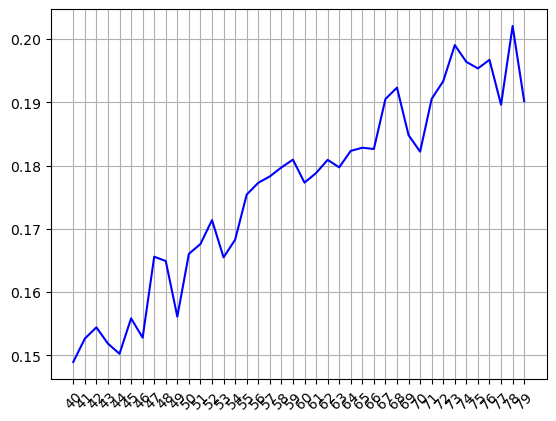

In [518]:
kkk_silhouette_score = [silhouette_score(X_train,i.labels_) for i in kkk1]
plt.plot(range(40,80),kkk_silhouette_score,c='b')
plt.xticks(np.arange(40,80, step=1),rotation=45)
plt.grid(True)
plt.show()

In [765]:
from sklearn.decomposition import PCA

In [822]:
pca =PCA(0.99)
X_train_pca = pca.fit_transform(X.data)
# X_val_pca = pca.transform(X_val)
# X_test_pca = pca.transform(X_test)

In [806]:
gms_per_k = [GaussianMixture(n_components=n,n_init=10,random_state=42).fit(X_train_pca) for n in range(110,140)]

In [807]:
aics = [round(olivetti_gau[i].aic(X_train_pca)) for i in range(len(gms_per_k))]

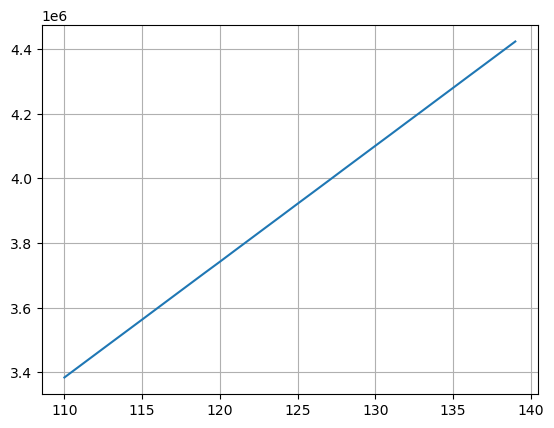

In [808]:
# [olivetti_gau[i].aic(X_train_pca) for i in range(len(olivetti_gau))]
plt.plot(range(110,140),aics)
plt.grid()
plt.show()

In [823]:
olivetti_gau = GaussianMixture(n_components=120,n_init=10,random_state=42).fit(X_train_pca)

In [824]:
X_olivetti, y_olivetti = olivetti_gau.sample(6)

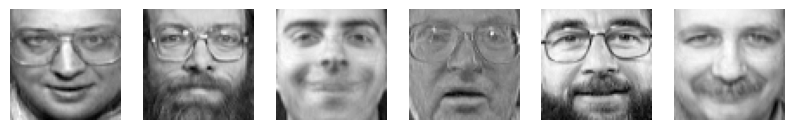

In [836]:
plt.figure(figsize=(10,5))
for i,j in enumerate(X_olivetti):
    plt.subplot(1,6,i+1)
    plt.imshow(pca.inverse_transform(j).reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
anomaly_flip = n

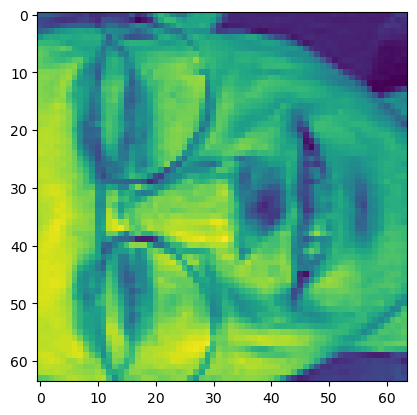

In [973]:
plt.imshow(np.rot90(X_train[0].reshape(64,64),1,(0,1)))
plt.show()

In [992]:
anomalies = np.r_[[np.rot90(X.data[i].reshape(64,64)).reshape(4096) for i in range(5)],
      [np.flip(X.data[i].reshape(64,64)).reshape(4096) for i in range(5,10)],
                 [np.rot90(X.data[i].reshape(64,64),-1).reshape(4096) for i in range(10,15)]]

X_train_anomalies = np.r_[X.data,anomalies]

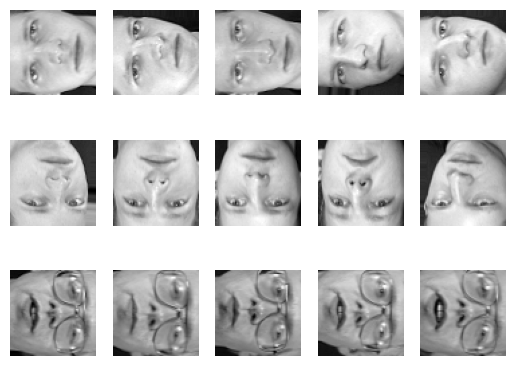

In [993]:
for i,j in enumerate(anomalies):
    plt.subplot(3,5,i+1)
    plt.imshow(j.reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

In [994]:
X_train_pca.shape

(400, 260)

In [995]:
percentage_of_anomalies = (len(anomalies)/len(X_train_anomalies))*100
percentage_of_anomalies

3.614457831325301

In [996]:
pca_anomalies =PCA(0.99)
X_train_pca_anomalies = pca_anomalies.fit_transform(X_train_anomalies)

In [1002]:
olivetti_gau_anomalies = GaussianMixture(n_components=200,n_init=10,random_state=42).fit(X_train_pca_anomalies)

In [1003]:
densities = olivetti_gau_anomalies.score_samples(X_train_pca_anomalies)
density_threshold = np.percentile(densities,percentage_of_anomalies)
anomalies_image = X_train_pca_anomalies[densities<density_threshold]

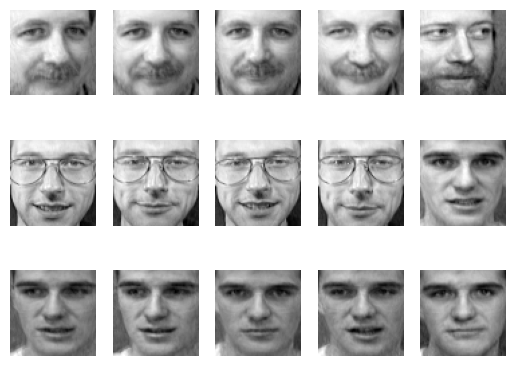

In [1004]:
for i,j in enumerate(anomalies_image):
    plt.subplot(3,5,i+1)
    plt.imshow(pca_anomalies.inverse_transform(j).reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()